### Simulation of geodesic using einsteinpy

In [4]:

import numpy as np
import astropy.units as u

from plotly.offline import init_notebook_mode

from einsteinpy.plotting import GeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential, BoyerLindquistDifferential
from einsteinpy.bodies import Body
from einsteinpy.geodesic import Geodesic
from einsteinpy.metric import Kerr

init_notebook_mode(connected=True)


##### User input and initialisation

In [5]:
# Example: Simulating Earth

## Source ##

m = 2e30 # kg

spin_factor = 0 # spin_factor = J/(Mc) (metres)

## Test Particle ##

# initial position cordinates

r = 1.47e11                      # (metres)

theta = np.pi/2                  # (radians)

phi = np.pi                      # (radians)

# initial velocity vectors at initial position

Vr = 0                           # (m/s)

Vtheta = 0                       # (rad/s)
 
Vphi = 30.29e3/1.47e11           # (rad/s)


In [12]:
# Source 

Attractor = Body(name="attracter", mass=m * u.kg, a=spin_factor*u.m, parent=None)

# Test Object initial position (in spherical coordinates) & initial velocity
sph_obj = BoyerLindquistDifferential(r*u.m, theta*u.rad, phi*u.rad, Vr*u.m/u.s, Vtheta*u.rad/u.s, Vphi*u.rad/u.s, spin_factor*u.m)
####sph_obj = SphericalDifferential(r*u.m, theta*u.rad, phi*u.rad, Vr*u.m/u.s, Vtheta*u.rad/u.s, Vphi*u.rad/u.s)
Object = Body(name="testparticle", differential=sph_obj, parent=Attractor)

# geodesic simulation
geodesic = Geodesic(body=Object, time=0 * u.s, end_lambda= ((1 * u.year).to(u.s)).value, step_size=((5 * u.min).to(u.s)).value, metric=Kerr)

#### Plotting the trajectory of test particle

In [13]:
obj = GeodesicPlotter()
obj.plot(geodesic)
obj.show()


#### Animation of the trajectory of the test particle

<IPython.core.display.Javascript object>


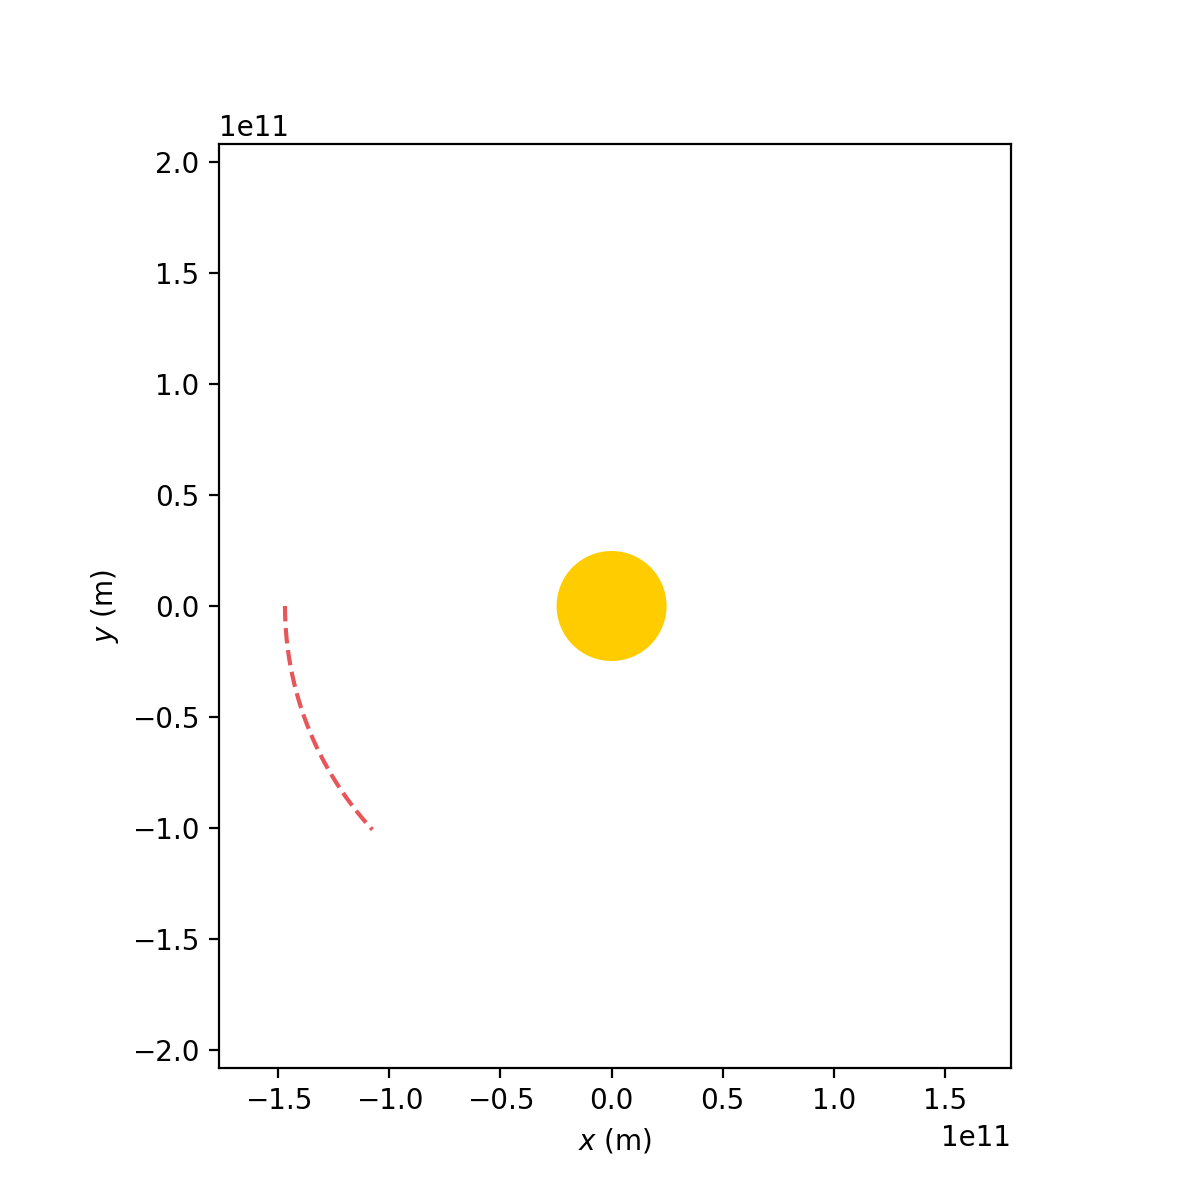

In [14]:
from einsteinpy.plotting import StaticGeodesicPlotter
%matplotlib notebook
obj = StaticGeodesicPlotter()
obj.animate(geodesic, interval=1)
obj.show()